#  Lesson1：使用Keras进行简单的线性拟合
## 2018-8-15，苏康


In [9]:
# -*- coding:utf-8 -*-
##required packages
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import SGD

###create data and add some noise
#####如何用numpy建立一个等差数列，并加入噪声(噪声服从高斯分布)
x_=np.linspace(-1,1,100)[:,np.newaxis]####x_.shape=(100,1)
y_=3*x_+1+np.random.standard_normal(x_.shape)*0.2####(mean=0, stdev=1)
#####也可以这么写####
'''
x_=np.linspace(-1,1,100)
x_=np.expand_dims(x_, axis=0)
y_=3*x+np.random.randn(x.shape[1])*0.2+1
'''


Using TensorFlow backend.


'\nx_=np.linspace(-1,1,100)\nx_=np.expand_dims(x_, axis=0)\ny_=3*x+np.random.randn(x.shape[1])*0.2+1\n'

In [13]:
###trick(jupuyer magic)
? np.random.standard_normal

### Data Visualization with $Latex$ formatting

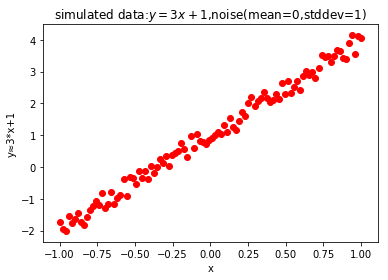

In [95]:
#####数据可视化
import matplotlib.pyplot as plt
%matplotlib inline 
plt.scatter(x_,y_,c='red')
plt.title("simulated data:$y\appox3x+1$,noise(mean=0,stddev=1)")
plt.xlabel("x")
plt.ylabel("y≈3*x+1")
plt.show()

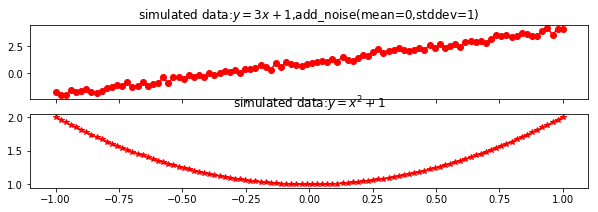

In [107]:
fig,axis=plt.subplots(2,1,figsize=(10,3))
axis[0].plot(x_,y_,c='red',marker='o')
axis[0].set_title("simulated data:$y=3x+1$,add_noise(mean=0,stddev=1)")
plt.setp(axis[0].get_xticklabels(), visible=False)
z=x_**2+1
axis[1].plot(x_,z,c='red',marker='*')
axis[1].set_title("simulated data:$y=x^2+1$")
plt.show()

### 什么是神经网络
假设这个周末就要来了，你听说你所在的城市有个奶酪节。你喜欢奶酪，正试着决定是否去参加。你也许会通过给三个因素设置权重来作出决定：
a. 天⽓好吗？
b. 你的男朋友或者⼥朋友会不会陪你去？
c. 这个节⽇举办的地点是否靠近交通站点？（你没有⻋）
![神经元](./xxq/1.png)
1. $y=\varphi(w_1*x_1+w_2*x_2+w_3*x_3+b)=\varphi(W^{T}X)$

其中 $W=\left[
  \begin{array}{ccc}    
    b\\
    w_1\\
    w_2\\
    w_3
  \end{array}\right]$,
  $X=\left[
  \begin{array}{ccc}    
    1\\
    x_1\\
    x_2\\
    x_3
  \end{array}\right]$,$W$称为权值，$X$称为输入(通常每一行表示一个样本，每一列表示一个维度)，我们把$\varphi(x)$称为激活函数(activation function),机器学习最常用的两分类激活函数是sigmoid函数，其函数表达式为$sigmoid(x)=\frac{1}{1+e^{-x}}$,请画出其在[-5,5]间的函数图像

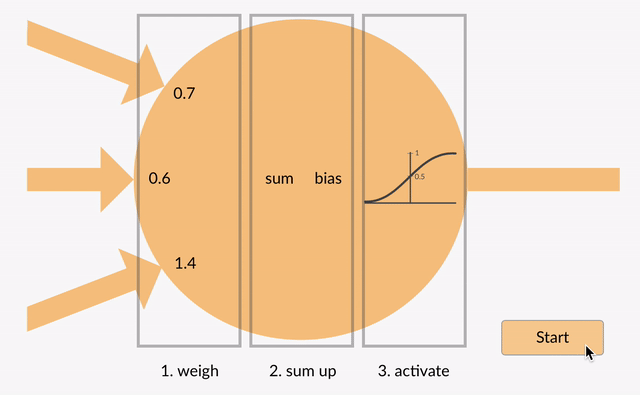

### 神经网络结构
![神经网络结构](./xxq/2.png)

输入层，隐含层，输出层

![MLP及深度学习](./xxq/3.png)

对神经网络有个概念(单层，多层，深度网络[>6])

全连接(Dense layer)：全连接层的每一个结点都与上一层的所有结点相连，用来把前边提取到的特征综合起来。由于其全相连的特性，一般全连接层的参数也是最多的。

过拟合(overfitting)

#### keras中文文档学习链接： http://keras-cn.readthedocs.io/en/latest/for_beginners/concepts/ 

In [68]:
####贯序模式####
model=Sequential()
####全连接层####
model.add(Dense(output_dim=1,input_dim=1,init='normal',activation='linear'))
#############model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error',metrics=['accuracy'])

e:\python\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, activation="linear", units=1, kernel_initializer="normal")`
  after removing the cwd from sys.path.


In [69]:
###optimzier:优化器，loss:损耗函数 accuracy:性能评估

###SGD:随机梯度下降法，支持动量参数，支持学习衰减率，支持Nesterov动量
model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error',metrics=['accuracy'])

####train the model verbose=1 显示进度条，0为不显示
model.fit(x_,y_,epochs=100,verbose=1)

Epoch 1/100
100/100 [==============================] - 0s 2ms/step - loss: 3.9782 - acc: 0.0000e+00
Epoch 2/100
100/100 [==============================] - 0s 198us/step - loss: 3.6888 - acc: 0.0000e+00
Epoch 3/100
100/100 [==============================] - 0s 210us/step - loss: 3.4219 - acc: 0.0000e+00
Epoch 4/100
100/100 [==============================] - 0s 451us/step - loss: 3.1940 - acc: 0.0000e+00
Epoch 5/100
100/100 [==============================] - 0s 234us/step - loss: 2.9314 - acc: 0.0000e+00
Epoch 6/100
100/100 [==============================] - 0s 220us/step - loss: 2.7546 - acc: 0.0000e+00
Epoch 7/100
100/100 [==============================] - 0s 216us/step - loss: 2.5392 - acc: 0.0000e+00
Epoch 8/100
100/100 [==============================] - 0s 183us/step - loss: 2.3925 - acc: 0.0000e+00
Epoch 9/100
100/100 [==============================] - 0s 174us/step - loss: 2.2672 - acc: 0.0000e+00
Epoch 10/100
100/100 [==============================] - 0s 186us/step - loss: 2.1210

In [74]:
pred=model.predict([0.23,0.52],verbose=0)####得出预测值

In [75]:
pred

array([[1.6533792],
       [2.4519925]], dtype=float32)

In [77]:
actual=[3*i+1 for i in [0.23,0.52]]#####实际值

In [78]:
actual

[1.69, 2.56]